In [2]:
import pandas as pd
import matplotlib
import matplotlib.dates as mdates  # Asegúrate de importar esta librería
matplotlib.use('Agg')  # Usar backend sin GUI
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np

In [1]:
import pandas as pd

# Crear un DataFrame con más de una variable numérica
data = {
    'Valores': [100, 150, 200, 250, 300, 400, 500, 600, 700, 800],
    'Maximos': [300, 450, 200, 300, 700, 900, 1000, 1200, 1400, 1600],
    'Medios': [200, 350, 180, 290, 500, 800, 750, 900, 1000, 1300],
    'Mínimos': [50, 120, 90, 180, 250, 400, 450, 600, 800, 900]
}

df = pd.DataFrame(data)

# Guardar como CSV para pruebas
df.to_csv(r"C:\Users\nmarq\Desktop\python\PROYECTOS\Web Development\uploads\dataset_pequeno.csv", index=False)

# Mostrar los datos
print(df)

   Valores  Maximos  Medios  Mínimos
0      100      300     200       50
1      150      450     350      120
2      200      200     180       90
3      250      300     290      180
4      300      700     500      250
5      400      900     800      400
6      500     1000     750      450
7      600     1200     900      600
8      700     1400    1000      800
9      800     1600    1300      900


In [3]:


# Eliminar espacios en los nombres de las columnas
df.columns = df.columns.str.strip()

# Convertir las columnas a numéricas (si hay errores, convertir NaN a 0)
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print(df.dtypes)  # Verifica que las columnas sean numéricas

Valores    int64
Maximos    int64
Medios     int64
Mínimos    int64
dtype: object


### Old

In [29]:
def create_plot(dataframe, plot_path, x_column, y_column, chart_type):
    """
    Genera un gráfico basado en dos columnas y un tipo de gráfico.

    Args:
        dataframe (pd.DataFrame): Datos a graficar.
        plot_path (str): Ruta para guardar el gráfico.
        x_column (str): Nombre de la columna para el eje X.
        y_column (str): Nombre de la columna para el eje Y.
        chart_type (str): Tipo de gráfico a generar.

    Returns:
        None
    """
    
    print(dataframe[[x_column, y_column]].head())
    plt.figure(figsize=(12, 8))  # Tamaño aumentado para mejor visualización

    # Generar el gráfico según el tipo seleccionado
    ax = None
    if chart_type == 'line':
        ax = dataframe.plot(x=x_column, y=y_column, kind='line', marker='o', legend=False)
    elif chart_type == 'bar':
        ax = dataframe.plot(x=x_column, y=y_column, kind='bar', legend=False)
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    elif chart_type == 'scatter':
        plt.scatter(dataframe[x_column], dataframe[y_column])
        plt.xlabel(x_column)
        plt.ylabel(y_column)
        plt.title("Gráfico de Dispersión")
        plt.grid(False)  # Eliminamos grid en scatter por defecto
    else:
        raise ValueError("Tipo de gráfico no soportado")

    # Formatear las fechas si el eje X contiene datos datetime
    if pd.api.types.is_datetime64_any_dtype(dataframe[x_column]):
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Formato: día-mes-año
        plt.gcf().autofmt_xdate()  # Rotar las fechas automáticamente para mejor legibilidad

    print(dataframe[[x_column, y_column]].head())
    
    # Añadir etiquetas de datos
    if chart_type in ['line', 'bar']:  # Etiquetas solo para gráficos de línea y barra
        for i in range(len(dataframe)):
            plt.text(i, dataframe[y_column].iloc[i], str(dataframe[y_column].iloc[i]), 
                     ha='center', va='bottom', fontsize=10)

    # Configuración general del gráfico
    if chart_type != 'scatter':
        ax.set_title("Gráfico generado")
        ax.set_xlabel(x_column)
        ax.set_ylabel(y_column)
        plt.grid(False)  # Eliminamos el grid por defecto

    # Guardar el gráfico
    plt.savefig(plot_path, bbox_inches='tight')  # Guardamos con espaciado ajustado
    plt.close()

In [30]:
def get_columns(filepath):
    """
    Extrae las columnas disponibles en el archivo subido, filtrando solo columnas numéricas o de tipo fecha.
    Detecta automáticamente columnas con formato de fecha solo si no son numéricas.

    Args:
        filepath (str): Ruta del archivo subido.

    Returns:
        list: Lista de nombres de columnas que son numéricas o de tipo fecha.
    """
    if filepath.endswith('.csv'):
        df = pd.read_csv(filepath)
    elif filepath.endswith('.xlsx'):
        df = pd.read_excel(filepath)
    else:
        raise ValueError("Formato de archivo no soportado")

    # Filtrar columnas numéricas y convertir solo las no numéricas a formato de fecha
    valid_columns = []
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            valid_columns.append(col)
        else:
            try:
                # Intentar convertir la columna a formato de fecha
                converted_col = pd.to_datetime(df[col], errors='coerce')
                if converted_col.notna().sum() > 0:  # Aceptar solo si hay valores válidos
                    valid_columns.append(col)
            except Exception:
                pass  # Ignorar si la conversión falla

    return valid_columns


def process_file(filepath, x_column, y_column, chart_type):
    """
    Genera un gráfico basado en las columnas y el tipo seleccionados.

    Args:
        filepath (str): Ruta del archivo subido.
        x_column (str): Nombre de la columna para el eje X.
        y_column (str): Nombre de la columna para el eje Y.
        chart_type (str): Tipo de gráfico a generar.

    Returns:
        str: Ruta relativa del gráfico generado.
    """
    # Leer el archivo dependiendo de su formato
    if filepath.endswith('.csv'):
        df = pd.read_csv(filepath)
    elif filepath.endswith('.xlsx'):
        df = pd.read_excel(filepath)
    else:
        raise ValueError("Formato de archivo no soportado")

    # # Intentar convertir automáticamente columnas no numéricas al formato de fecha
    # for col in df.columns:
    #     if not pd.api.types.is_numeric_dtype(df[col]):
    #         try:
    #             df[col] = pd.to_datetime(df[col], errors='coerce')
    #         except Exception:
    #             pass  # Ignorar si la conversión falla
    
    
    # Mostrar los valores originales de la columna de fechas
    print(f"Valores originales de la columna {x_column}:")
    print(df[x_column].head())
# Convertir explícitamente la columna de fechas si no es numérica
    if not pd.api.types.is_numeric_dtype(df[x_column]):
        try:
            df[x_column] = pd.to_datetime(df[x_column], format='%Y-%m-%d', errors='coerce')  # Conversión directa a fecha
            print(f"Fechas convertidas en la columna {x_column}:")
            print(df[x_column].head())
        except Exception as e:
            raise ValueError(f"Error al convertir la columna {x_column} a formato fecha: {e}")

    # Identificar valores no convertidos
    non_converted = df[df[x_column].isna()][x_column]
    if not non_converted.empty:
        print("Valores no convertidos a fecha:")
        print(non_converted)

    # Ruta donde se guardará el gráfico
    plot_path = 'app/static/plot.png'

    # Generar el gráfico
    create_plot(df, plot_path, x_column, y_column, chart_type)

    # Retornar la ruta relativa para Flask
    return 'static/plot.png'




In [3]:
filepath = r"C:\Users\nmarq\Desktop\python\PROYECTOS\Web Development\uploads\prueba_csv - copia.csv"

In [4]:
df = pd.read_csv(filepath)
df.head()

,Fecha,Valores,Maximos
0,2025-01-01,100,300
1,2025-01-02,150,450
2,2025-01-03,200,200
3,2025-01-04,250,300
4,2025-01-05,300,700


In [5]:
df.dtypes

Fecha       object
Valores      int64
 Maximos     int64
dtype: object

In [6]:
x_column = "Fecha"
y_column = " Maximos"

In [7]:
if not pd.api.types.is_numeric_dtype(df[x_column]):
        try:
            df[x_column] = pd.to_datetime(df[x_column], format='%Y-%m-%d', errors='coerce')  # Conversión directa a fecha
            print(f"Fechas convertidas en la columna {x_column}:")
            print(df[x_column].head())
        except Exception as e:
            raise ValueError(f"Error al convertir la columna {x_column} a formato fecha: {e}")

Fechas convertidas en la columna Fecha:
0   2025-01-01
1   2025-01-02
2   2025-01-03
3   2025-01-04
4   2025-01-05
Name: Fecha, dtype: datetime64[ns]


In [25]:
df[x_column] = pd.to_datetime(df[x_column], format='%Y-%m-%d').dt.normalize()

In [26]:
print(df[x_column].head())

0   2025-01-01
1   2025-01-02
2   2025-01-03
3   2025-01-04
4   2025-01-05
Name: Fecha, dtype: datetime64[ns]


In [27]:
df.dtypes

Fecha       datetime64[ns]
Valores              int64
 Maximos             int64
dtype: object

<Figure size 1200x800 with 0 Axes>

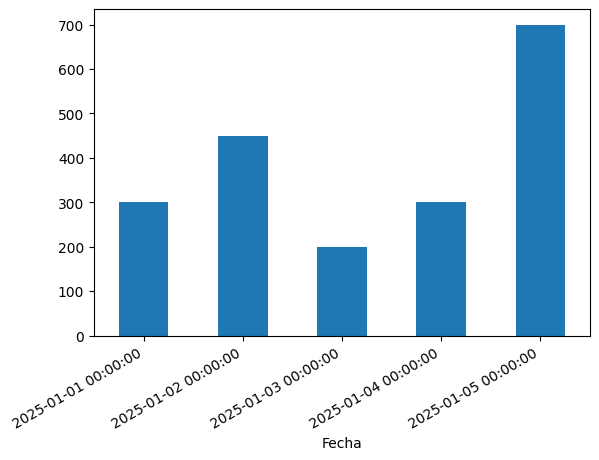

In [28]:
### Creamos un Plot de todos los meses con cada año agrupado
plt.figure(figsize = (12,8))

ax = df.plot(x=x_column, y=y_column, kind='bar', legend=False)
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Formato: día-mes-año
plt.gcf().autofmt_xdate()  # Rotar las fechas automáticamente para mejor legibilidad
    

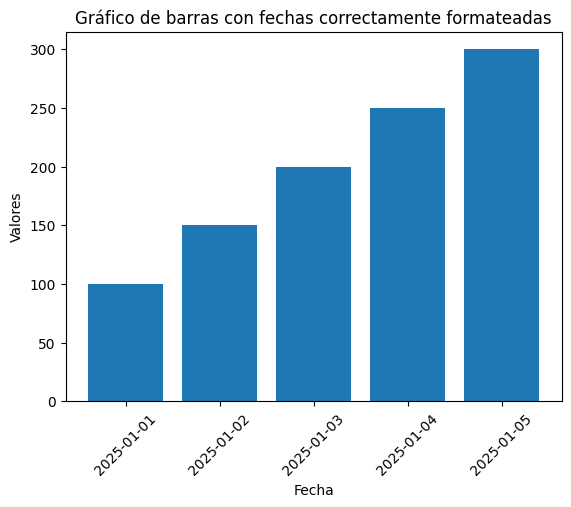

In [29]:
# Convertir la columna 'Fecha' a datetime
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Crear un gráfico de barras manualmente con control total
fig, ax = plt.subplots()
ax.bar(df['Fecha'], df['Valores'], width=0.8)  # Usa las fechas como eje x

# Configurar el formateador de fechas para mostrar solo 'YYYY-MM-DD'
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Ajustar la rotación de etiquetas para mejor legibilidad
plt.xticks(rotation=45)

# Etiquetas y título
ax.set_xlabel('Fecha')
ax.set_ylabel('Valores')
ax.set_title('Gráfico de barras con fechas correctamente formateadas')

# Mostrar el gráfico
plt.show()